In [1]:
from transpile_benchy.interface import QASMBench, RedQueen
from transpile_benchy.interface import MQTBench
from transpile_benchy.metrics import DepthMetric
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from virtual_swap.pass_managers import SabreVS, QiskitLevel3
from virtual_swap.utilities import SubsMetric

depth_metric = DepthMetric(basis_gate=iSwapGate().power(1 / 2))

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | xx_plus_yy
 50.00% =    1/2    	 | 2.00	 | xx_plus_yy.xx_plus_yy
100.00% =    1/1    	 | 3.00	 | xx_plus_yy.xx_plus_yy.xx_plus_yy


In [2]:
coupling_map = CouplingMap.from_line(8)
filter_list = ["fredkin", "toffoli", "adder_n4"]
qasm_bench_m = QASMBench(size="small", filter_list=filter_list)
filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae", "qgan"]
filter_list = ["None"]
mqt_bench = MQTBench(num_qubits=8, filter_list=filter_list)

In [3]:
# coupling_map = CouplingMap.from_grid(6,6)
# filter_list = None
# qasm_bench_m = QASMBench(size="medium", filter_list=filter_list)
# filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae", "qgan", "qpe"]
# filter_list = ["None"]
# mqt_bench = MQTBench(num_qubits=8, filter_list=filter_list)

In [4]:
# from qiskit.circuit.library import CXGate, iSwapGate
# from qiskit.extensions import UnitaryGate
# from weylchamber import canonical_gate
# from transpile_benchy.interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# num_qubits = 8
# coupling_map = CouplingMap.from_line(num_qubits)
# # coupling_map = CouplingMap.from_grid(3, 3)


# def create_TwoLocal_function(
#     entanglement_blocks, entanglement_name, entanglement_type="full", reps=2
# ):
#     """Generates a function to create a TwoLocal object with given parameters"""

#     def TwoLocal_function(n_qubits):
#         return TwoLocal(n_qubits, "ry", entanglement_blocks, entanglement_type, reps)

#     TwoLocal_function.__name__ = (
#         # f"TwoLocal_{entanglement_type}_{entanglement_name}_{reps}reps"
#         f"TwoLocal-{entanglement_name}"
#     )
#     return TwoLocal_function


# def generate_interface_from_data(data, qubits_options):
#     """Generates a QiskitFunctionInterface from gate data and qubits options"""
#     gate, name = data
#     func = create_TwoLocal_function(gate, name)
#     return QiskitFunctionInterface(func, qubits_options)


# num_qubits_options = [num_qubits]  # Or any other options you'd like

# # Specify the gate blocks and their names
# entanglement_blocks_data = [
#     (CXGate(), r"$\texttt{CNOT}$"),
#     # (CXGate().power(1 / 2), r"$\sqrt{\texttt{CNOT}}$"),
#     (iSwapGate(), r"$\texttt{iSWAP}$"),
#     (iSwapGate().power(1 / 2), r"$\sqrt{\texttt{iSWAP}}$"),
#     (UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full()), r"$\texttt{ECP}$"),
# ]

# qiskit_functions_twolocal = [
#     generate_interface_from_data(data, num_qubits_options)
#     for data in entanglement_blocks_data
# ]

In [5]:
import logging
from transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
# transpile_benchy_logger.setLevel(logging.INFO)
transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

benchmark = Benchmark(
    transpilers=[
        # SabreQiskit(coupling_map, cx_basis=True),
        QiskitLevel3(coupling_map, cx_basis=True),
        SabreVS(coupling_map, cx_basis=True),
        # SabreQiskit(coupling_map),
        QiskitLevel3(coupling_map),
        SabreVS(coupling_map, logger=transpile_benchy_logger),
    ],
    # submodules=qiskit_functions_twolocal,
    submodules=[qasm_bench_m, mqt_bench],
    metrics=[depth_metric, SubsMetric()],
    logger=transpile_benchy_logger,
    num_runs=5,
)

# submodules=[qasm_bench_s],
# submodules=[mqt],
# submodules=[
# MQTBench(num_qubits=4, filter_str="qaoa"),
# # MQTBench(num_qubits=8, filter_str="qaoa"),
# # MQTBench(num_qubits=12, filter_str="qaoa"),
# # MQTBench(num_qubits=16, filter_str="qaoa"),
# ],

benchmark.run()

Running circuits for QASMBench:   0%|          | 0/3 [00:00<?, ?it/s]

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


Running circuits for QASMBench: 100%|██████████| 3/3 [03:27<00:00, 69.10s/it]
Running circuits for MQTBench: 0it [00:00, ?it/s]


In [6]:
# TODO filter add to results tracking, # number of added SWAPs, # of CNS subs
# remove the results if qiskit adds 0 SWAPS (can't be improved)
# reduce to a set of ~8 circuits at ~16Q scale....

In [7]:
# print(benchmark.results)

In [16]:
# find average improvement from 'Qiskit-$\\texttt{CNOT}$' to 'SABREVS-$\\texttt{CNOT}$'
# find average improvement from 'Qiskit-$\\sqrt{\\texttt{iSWAP}}$' to 'SABREVS-$\\sqrt{\\texttt{iSWAP}}$'
key = "monodromy_depth"
# key = 'accepted_subs'
l1 = list(
    x["Qiskit-$\\texttt{CNOT}$"].average
    for x in benchmark.results.results[key].values()
)
l2 = list(
    x["SABREVS-$\\texttt{CNOT}$"].average
    for x in benchmark.results.results[key].values()
)

l3 = list(
    x["Qiskit-$\\sqrt{\\texttt{iSWAP}}$"].average
    for x in benchmark.results.results[key].values()
)
l4 = list(
    x["SABREVS-$\\sqrt{\\texttt{iSWAP}}$"].average
    for x in benchmark.results.results[key].values()
)

# average element wise percent improvmement
print(sum((x - y) / x for x, y in zip(l1, l2)) / len(l1))
print(sum((x - y) / x for x, y in zip(l3, l4)) / len(l3))

0.09090578961840656
0.18803418803418803


In [17]:
l3 = list(
    x["Qiskit-$\\sqrt{\\texttt{iSWAP}}$"].average
    for x in benchmark.results.results[key].values()
)
l4 = list(
    x["SABREVS-$\\sqrt{\\texttt{iSWAP}}$"].average
    for x in benchmark.results.results[key].values()
)

In [10]:
print(l3)

[13.0, 21.0, 13.0]


In [11]:
print(l4)

[10.000000000000002, 13.999999999999996, 13.0]


In [12]:
key = "accepted_subs"
l4 = list(
    x["SABREVS-$\\sqrt{\\texttt{iSWAP}}$"].average
    for x in benchmark.results.results[key].values()
)
# average
print(sum(l4) / len(l4))

0.25


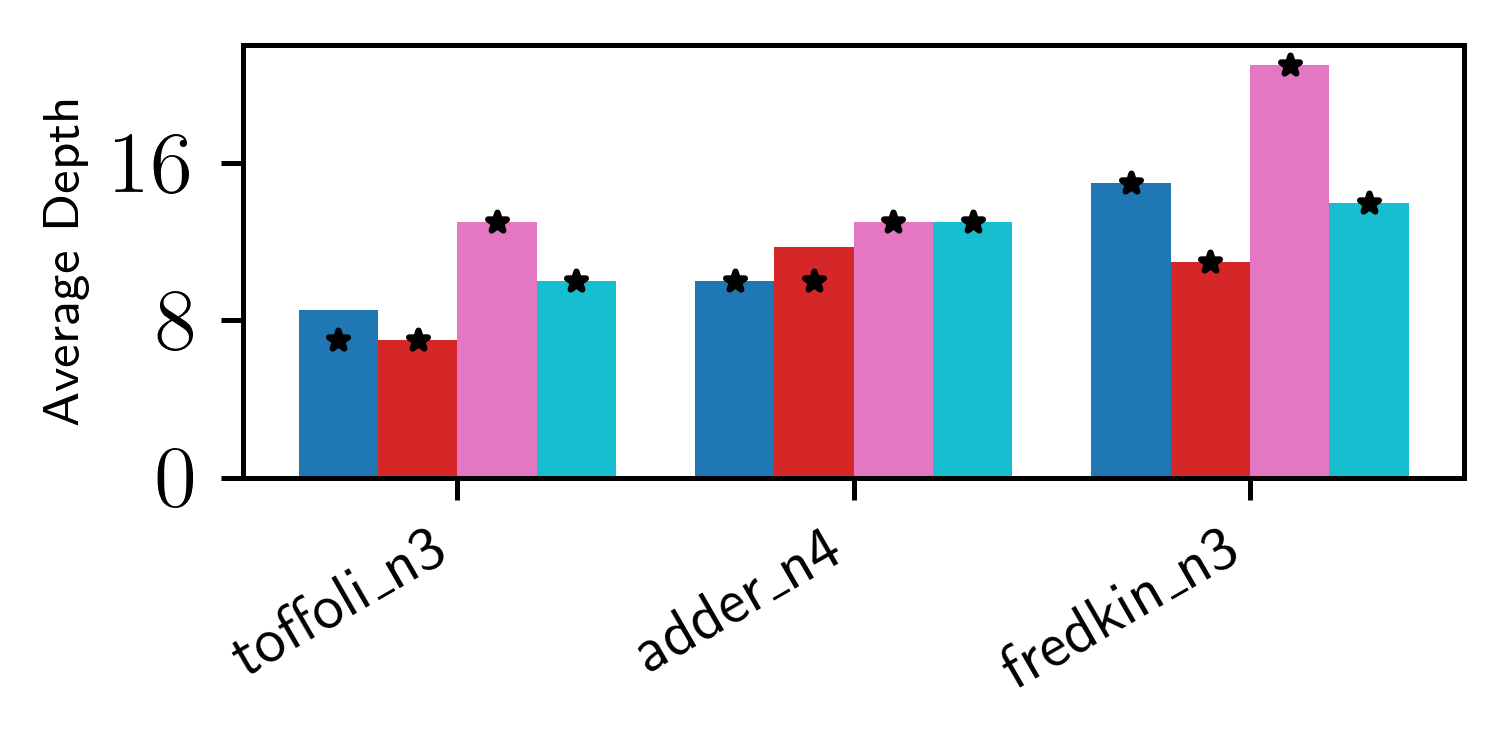

In [18]:
benchmark.plot(save=1, legend_show=0)

In [14]:
# from transpile_benchy.interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# entanglement_types = ["linear", "full", "circular", "sca"]
# entanglement_types = ["full"] #, "reverse_linear"]


# def function_generator(entanglement_type):
#     def entanglement_function(n_qubits):
#         return TwoLocal(n_qubits, ["ry"], "cx", entanglement_type, reps=1)

#     entanglement_function.__name__ = f"TwoLocal_{entanglement_type}"
#     return entanglement_function


# num_qubits_options = [8]

# qiskit_functions_twolocal = [
#     QiskitFunctionInterface(function_generator(entanglement_type), num_qubits_options)
#     for entanglement_type in entanglement_types
# ]

# # 5Q backend = provider.backend.ibmq_quito
# # 20Q backend = provider.backend.ibmq_mumbai
# from typing import Callable, List
# from transpile_benchy.interface import QiskitFunctionInterface

# num_qubits = [8]  # , 20, 24, 28, 32, 36]
# from qiskit.circuit.library import QFT, QuantumVolume

# qiskit_functions_qft = QiskitFunctionInterface(QFT, num_qubits)
# qiskit_functions_qv = QiskitFunctionInterface(QuantumVolume, num_qubits)
# next(MQTBench(num_qubits=4, filter_str="qaoa").get_quantum_circuits()).draw('mpl', fold=-1)
# next(qasm_bench_m.get_quantum_circuits())

In [15]:
# from the literature
# toffoli
# fredkin
# EC codes
# Controlled phase
# QAOA
# Controlled phsae
# full entanling
# entanglemnt purification

# linaer, 2d, heavy-hex

# grover
# vqe
# bv
# qft
# qpe
# adder
# multipler
# sqn
# rd84
# co14
# sym9
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64
# toffoli
# fredkin
# adder
# qec_sm
# qec_en
# variational
# hs4
# shor
# pea
# error_correctiond3
# simons
# qaoa
# hhl
# dnn
# qpe
# ising

In [ ]:
# benchmarks from NASSC
# from Qiskit, QASMBench, RevLib
# grover_n4
# grover_n6
# grover_n8
# vqe_n8
# vqe_n12
# bv_n19
# qft_n15
# qft_20
# qpe_n9
# adder_n10
# multiplier_n25
# sqn_n258 (?)
# rd84_n253
# co14_n215
# sym9_n193

In [1]:
# benchmarks from PAS+PAM
# from qiskit, supermarq (qaoa)
# adder63
# mul60
# qft5
# qft64
# grover5
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64